In [1]:
import torch
from torch import nn 

import matplotlib.pyplot as plt

import numpy as np 



In [2]:
dev = "cuda" if torch.cuda.is_available() else "cpu" 



In [3]:
# import food dataset

import requests

import zipfile 
from pathlib import Path

In [4]:
data_path = Path("data/")
image_path = data_path / "pizza_steak_sushi"

# Download if data doesn't exist

if image_path.is_dir():
    print (f"{image_path} already exist")
else:
    print(f"creating image path")
    image_path.mkdir(parents=True, exist_ok=True)

#

data\pizza_steak_sushi already exist


In [5]:
with open(data_path / "data.zip", "wb") as f:
    request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
    print("Downloading data")
    f.write(request.content)

with zipfile.ZipFile(".\data\data.zip", "r") as zipref:
    print("unziping data file")
    zipref.extractall(image_path)

unziping data file


In [6]:
import os 
def explore_dir(dir_path):
    "explores dir_path returning the contents"
    for dirpath, dirnames, filenames in os.walk(dir_path):
        print(f"There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}")

In [7]:
explore_dir(image_path)

There are 2 directories and 0 images in data\pizza_steak_sushi
There are 3 directories and 0 images in data\pizza_steak_sushi\test
There are 0 directories and 25 images in data\pizza_steak_sushi\test\pizza
There are 0 directories and 19 images in data\pizza_steak_sushi\test\steak
There are 0 directories and 31 images in data\pizza_steak_sushi\test\sushi
There are 3 directories and 0 images in data\pizza_steak_sushi\train
There are 0 directories and 78 images in data\pizza_steak_sushi\train\pizza
There are 0 directories and 75 images in data\pizza_steak_sushi\train\steak
There are 0 directories and 72 images in data\pizza_steak_sushi\train\sushi


In [8]:
train_dir = image_path / "train"
test_dir = image_path / "test"

In [9]:
# Visualize images 
import random 
from PIL import Image 

image_path_list = list(image_path.glob("*/*/*.jpg"))

# pick a random image path
random_image_path = random.choice(image_path_list)
# random_image_path

image_class =random_image_path.parent.stem
#image_class

img = Image.open(random_image_path)

img_array = np.asarray(img)

In [10]:
img.height, img.width, img_array.shape

(512, 384, (512, 384, 3))

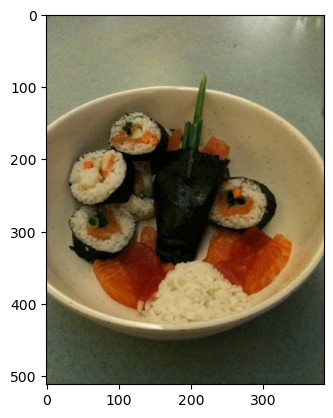

In [11]:
plt.imshow(img)

In [12]:
# Turning the data into tensors 

from torch.utils.data import DataLoader
from torchvision import datasets, transforms



c:\Users\jmhimara\miniconda3\envs\learning\Lib\site-packages\torchvision\io\image.py:13: UserWarning: Failed to load image Python extension: '[WinError 127] The specified procedure could not be found'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


In [13]:
data_transform = transforms.Compose([
    # resize 
    transforms.Resize(size=(64,64)),
    # flip
    transforms.RandomHorizontalFlip(p=0.5), 
    # Turn into tensor 
    transforms.ToTensor()

])

data_transform(img).shape

torch.Size([3, 64, 64])

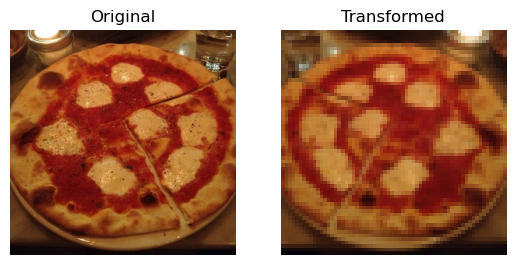

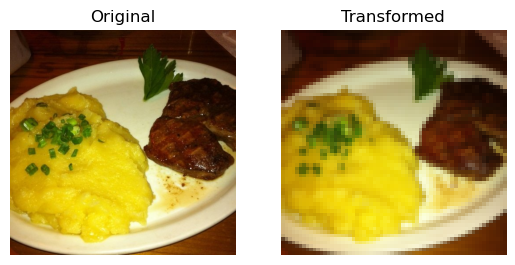

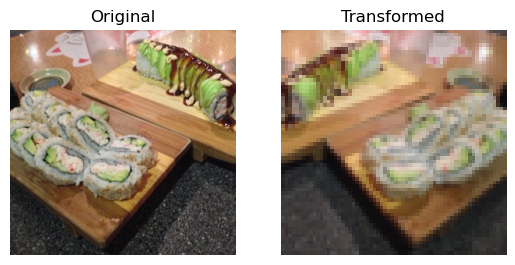

In [14]:
def plot_trasformed_images (image_paths, transform, n=3):
    
    random_image_paths = random.sample(image_paths, k=n)
    for image_path in random_image_paths:
        with Image.open(image_path) as f:
            fig, ax = plt.subplots(nrows=1, ncols=2)
            ax[0].imshow(f)
            ax[0].set_title ("Original")
            ax[0].axis(False)

            transformed_img = transform(f).permute(1,2,0)
            ax[1].imshow(transformed_img)
            ax[1].set_title("Transformed")
            ax[1].axis(False)

plot_trasformed_images(image_path_list, data_transform)

In [15]:
train_data = datasets.ImageFolder(root=train_dir, transform=data_transform)
test_data = datasets.ImageFolder(root=test_dir, transform=data_transform)

In [16]:
class_names = train_data.classes

In [17]:
# load into DataLoader
batch = 1
train_data_loader = DataLoader(train_data, batch_size = batch, num_workers=os.cpu_count(), shuffle=True)

test_data_loader = DataLoader(test_data, batch_size = batch, num_workers=os.cpu_count(), shuffle=False)

In [18]:
class_dict = train_data.class_to_idx
class_dict

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [19]:
## Loading image data not organized in neat folders. 

import os
import pathlib

from PIL import Image
from torch.utils.data import Dataset 

from torchvision import transforms 

from typing import Tuple, Dict, List


In [20]:
target_directory = train_dir

class_names_found = sorted([entry.name for entry in list(os.scandir(target_directory))])


In [21]:
class_names_found

['pizza', 'steak', 'sushi']

In [22]:
def find_classes(dir: str) -> Tuple[List[str], Dict[str, int]]:
    classes = sorted([entry.name for entry in list(os.scandir(dir)) if entry.is_dir()])

    if not classes: 
        raise FileNotFoundError ("Could not find classes in the directory", dir)
    
    class_to_idx = {class_name: i for i, class_name in enumerate(classes)}

    return classes, class_to_idx

In [23]:
find_classes(target_directory)

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

In [24]:
# replicate the functionality of image_folder

# create our own dataset 
# 1. subclass torch.utils.data.Dataset
# 2. init our subclass
# 3. create attributes
#   a. paths
#   b. transfomrs
#   c. classes
#   d. class_to_idx
# 4. function to load_images()
# 5. overwrite __len()__ method
# 6. overwrite __getitem()__ method




In [25]:
class ImageFolderCustom(Dataset):
    def __init__(self, targ_dir: str, transform=None):
        self.paths = list(pathlib.Path(targ_dir).glob("*/*.jpg"))

        self.transform = transform

        self.classes, self.class_to_idx = find_classes(targ_dir)


    def load_image(self, index: int) -> Image.Image:
        image_path = self.paths[index]
        return Image.open(image_path)
    
    def __len__(self) -> int:
        return len(self.paths)
    
    def __getitem__(self, index) -> Tuple[torch.Tensor, int]:
        img = self.load_image(index)
        class_name = self.paths[index].parent.name 
        class_idx = self.class_to_idx[class_name]

        # optionally, transform
        if self.transform:
            return self.transform(img), class_idx
        else:
            return img, class_idx 




In [26]:
train_transform = transforms.Compose([
    transforms.Resize(size=(64,64)), 
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor()    
])

test_transform = transforms.Compose([
    transforms.Resize(size=(64,64)), 
    transforms.ToTensor()    
])



In [27]:
# test ImageFolderCustom 

train_data_custom = ImageFolderCustom(train_dir, train_transform)
test_data_custom = ImageFolderCustom(test_dir, test_transform)


In [28]:
len(train_data_custom), len(train_data)

(225, 225)

In [29]:
# turn image dataset into dataloader
batch = 32
train_dataloader_custom = DataLoader(dataset = train_data_custom, 
                                     batch_size=batch, 
                                     shuffle=True)

test_dataloader_custom = DataLoader(dataset = test_data_custom, 
                                     batch_size=batch)

In [30]:
next(iter(train_dataloader_custom))


[tensor([[[[0.5804, 0.5843, 0.5725,  ..., 0.4902, 0.5451, 0.5686],
           [0.6039, 0.5882, 0.5725,  ..., 0.5098, 0.5294, 0.5529],
           [0.6000, 0.5569, 0.5137,  ..., 0.5294, 0.5020, 0.5529],
           ...,
           [0.4039, 0.3961, 0.3961,  ..., 0.5216, 0.5098, 0.5216],
           [0.4118, 0.4078, 0.4000,  ..., 0.5255, 0.5216, 0.5333],
           [0.4196, 0.4118, 0.4000,  ..., 0.5176, 0.5137, 0.5255]],
 
          [[0.4824, 0.4824, 0.4431,  ..., 0.4353, 0.4706, 0.4863],
           [0.4588, 0.4157, 0.3961,  ..., 0.4510, 0.4745, 0.4902],
           [0.4314, 0.3569, 0.3137,  ..., 0.4706, 0.4549, 0.4824],
           ...,
           [0.2039, 0.2000, 0.2000,  ..., 0.6353, 0.6275, 0.6235],
           [0.2078, 0.2039, 0.2039,  ..., 0.6196, 0.6235, 0.6353],
           [0.2039, 0.2000, 0.2000,  ..., 0.6235, 0.6196, 0.6157]],
 
          [[0.5569, 0.5255, 0.4431,  ..., 0.5255, 0.5529, 0.5608],
           [0.4353, 0.3647, 0.3098,  ..., 0.5373, 0.5529, 0.5529],
           [0.3490, 0.28

In [31]:
# Explore image transformations

# 1. trivual augment. 

train_transform = transforms.Compose([
    transforms.Resize(size=(224,224)), 
    transforms.TrivialAugmentWide(num_magnitude_bins=5),
    transforms.ToTensor()
])

test_transform = transforms.Compose([
    transforms.Resize(size=(224,224)), 
    transforms.ToTensor()
])



In [32]:
## Build model on custom dataset 
## TinyVGG without data augmentation

simple_transform = transforms.Compose([
    transforms.Resize(size=(64,64)), 
    transforms.ToTensor()    
])

train_data_simple = datasets.ImageFolder(root=train_dir, transform=simple_transform)

test_data_simple = datasets.ImageFolder(root=test_dir, transform=simple_transform)

train_dataloader_simple = DataLoader(train_data_simple, 32, shuffle=True)
test_dataloader_simple = DataLoader(test_data_simple, 32)

In [93]:
class SimpleModel0(nn.Module): 
    def __init__(self, input_shape, hidden_units, output_shape):
        super().__init__()

        self.conv_block1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape, 
                      out_channels=hidden_units, 
                      kernel_size=3, 
                      stride=1,
                      padding=0),
            nn.ReLU(), 
            nn.Conv2d(in_channels=hidden_units, 
                      out_channels=hidden_units, 
                      kernel_size=3, 
                      stride=1,
                      padding=0),
            nn.ReLU(), 
            nn.MaxPool2d(kernel_size=2, stride=2)
        ) 

        self.conv_block2 = nn.Sequential(
            nn.Conv2d(in_channels=hidden_units, 
                      out_channels=hidden_units, 
                      kernel_size=3, 
                      stride=1,
                      padding=0),
            nn.ReLU(), 
            nn.Conv2d(in_channels=hidden_units, 
                      out_channels=hidden_units, 
                      kernel_size=3, 
                      stride=1,
                      padding=0),
            nn.ReLU(), 
            nn.MaxPool2d(kernel_size=2, stride=2)
        ) 

        self.classifier = nn.Sequential(
            nn.Flatten(), 
            nn.Linear(in_features=hidden_units*13*13, 
                      out_features=output_shape)
        )

    def forward(self, x):
        #print("1st:", x.shape)
        x = self.conv_block1(x)
        #print("2nd:", x.shape)
        x = self.conv_block2(x)
        #print("3rd:", x.shape)
        return self.classifier(x)

In [34]:
simple_model0 = SimpleModel0(3, 10, len(class_names))
simple_model0 

SimpleModel0(
  (conv_block1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=2560, out_features=3, bias=True)
  )
)

In [35]:
# pass dummy data to the model. 

img_batch, label_batch = next(iter(train_dataloader_simple))

simple_model0(img_batch)

tensor([[-0.0258, -0.0124,  0.0099],
        [-0.0234, -0.0113,  0.0099],
        [-0.0265, -0.0079,  0.0113],
        [-0.0245, -0.0128,  0.0070],
        [-0.0229, -0.0102,  0.0081],
        [-0.0248, -0.0125,  0.0085],
        [-0.0270, -0.0118,  0.0076],
        [-0.0245, -0.0101,  0.0104],
        [-0.0241, -0.0124,  0.0090],
        [-0.0275, -0.0146,  0.0060],
        [-0.0239, -0.0126,  0.0117],
        [-0.0234, -0.0122,  0.0046],
        [-0.0242, -0.0087,  0.0112],
        [-0.0246, -0.0124,  0.0070],
        [-0.0252, -0.0143,  0.0101],
        [-0.0256, -0.0096,  0.0103],
        [-0.0236, -0.0110,  0.0106],
        [-0.0247, -0.0136,  0.0055],
        [-0.0283, -0.0129,  0.0104],
        [-0.0214, -0.0079,  0.0102],
        [-0.0245, -0.0110,  0.0091],
        [-0.0265, -0.0132,  0.0044],
        [-0.0256, -0.0112,  0.0079],
        [-0.0282, -0.0103,  0.0077],
        [-0.0243, -0.0135,  0.0088],
        [-0.0239, -0.0126,  0.0088],
        [-0.0252, -0.0131,  0.0079],
 

In [36]:
# use torchinfo to get summary of model. 

from torchinfo import summary

summary(simple_model0, input_size=(32, 3, 64, 64))

Layer (type:depth-idx)                   Output Shape              Param #
SimpleModel0                             [32, 3]                   --
├─Sequential: 1-1                        [32, 10, 32, 32]          --
│    └─Conv2d: 2-1                       [32, 10, 64, 64]          280
│    └─ReLU: 2-2                         [32, 10, 64, 64]          --
│    └─Conv2d: 2-3                       [32, 10, 64, 64]          910
│    └─ReLU: 2-4                         [32, 10, 64, 64]          --
│    └─MaxPool2d: 2-5                    [32, 10, 32, 32]          --
├─Sequential: 1-2                        [32, 10, 16, 16]          --
│    └─Conv2d: 2-6                       [32, 10, 32, 32]          910
│    └─ReLU: 2-7                         [32, 10, 32, 32]          --
│    └─Conv2d: 2-8                       [32, 10, 32, 32]          910
│    └─ReLU: 2-9                         [32, 10, 32, 32]          --
│    └─MaxPool2d: 2-10                   [32, 10, 16, 16]          --
├─Sequentia

In [66]:
# train and test functions

def train_step(model, dataloader, loss_fn, optimizer):
    model.train()

    train_loss, train_acc = 0, 0 
    
    for batch, (x,y) in enumerate(dataloader):

        y_pred = model(x)
        loss = loss_fn(y_pred, y)

        train_loss += loss.item()

        optimizer.zero_grad()

        loss.backward()

        optimizer.step()

        y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)

        train_acc += (y_pred_class==y).sum().item() / len(y_pred)

    # adjust metrics to get average values per batch

    train_loss = train_loss / len(dataloader)
    train_acc  = train_acc / len(dataloader)
    return train_loss, train_acc


def test_step(model, dataloader, loss_fn):
    
    model.eval()

    test_loss, test_acc = 0, 0 

    with torch.inference_mode():
        for batch, (x,y) in enumerate(dataloader):

            y_pred = model(x)
            loss = loss_fn(y_pred, y)

            test_loss += loss.item()


            
            y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
            test_acc += (y_pred_class==y).sum().item() / len(y_pred)


    test_loss = test_loss / len(dataloader)
    test_acc  = test_acc / len(dataloader)
    return test_loss, test_acc

In [67]:
# create a train function 



def train(model, epochs, train_dl, test_dl, loss, optimizer):

    # create results dictionary
    results = {"train_loss": [],
               "train_acc": [], 
               "test_loss": [], 
               "test_acc": []}

    for epoch in range(epochs): 
        train_loss, train_acc  = train_step(model, train_dl, loss, optimizer)

        test_loss, test_acc = test_step(model, test_dl, loss)

        print(f"Epoch: {epoch}, Train Loss: {train_loss:.4f}, Train_acc: {train_acc:.4f}, Test_acc: {test_acc:.4f}")

        results["train_loss"].append(train_loss)
        results["train_acc"].append(train_acc)
        results["test_loss"].append(test_loss)
        results["test_acc"].append(test_acc)


    return results
    


In [39]:
simple_model0 = SimpleModel0(3, 10, len(class_names))

loss_fn = nn.CrossEntropyLoss()

optimizer = torch.optim.Adam(simple_model0.parameters(), lr=0.01)


results = train(simple_model0, 10, train_data_loader, test_dataloader_simple, loss_fn, optimizer)

Epoch: 0, Train Loss: 1.1322, Train_acc: 0.3067, Test_acc: 0.2604
Epoch: 1, Train Loss: 1.1042, Train_acc: 0.2844, Test_acc: 0.2604
Epoch: 2, Train Loss: 1.1015, Train_acc: 0.3244, Test_acc: 0.2604
Epoch: 3, Train Loss: 1.1056, Train_acc: 0.3467, Test_acc: 0.2604
Epoch: 4, Train Loss: 1.1047, Train_acc: 0.3156, Test_acc: 0.1979
Epoch: 5, Train Loss: 1.1030, Train_acc: 0.3022, Test_acc: 0.1979
Epoch: 6, Train Loss: 1.1037, Train_acc: 0.3289, Test_acc: 0.2604
Epoch: 7, Train Loss: 1.1036, Train_acc: 0.2933, Test_acc: 0.2604
Epoch: 8, Train Loss: 1.1037, Train_acc: 0.2978, Test_acc: 0.2604
Epoch: 9, Train Loss: 1.1025, Train_acc: 0.2933, Test_acc: 0.2604


In [40]:
results

{'train_loss': [1.1322314476966857,
  1.104161664644877,
  1.101526460647583,
  1.1055510685178969,
  1.1047280467881098,
  1.1029798242780897,
  1.1036706267462837,
  1.1035771756702,
  1.1036835977766248,
  1.102525004280938],
 'train_acc': [0.30666666666666664,
  0.28444444444444444,
  0.3244444444444444,
  0.3466666666666667,
  0.31555555555555553,
  0.3022222222222222,
  0.3288888888888889,
  0.29333333333333333,
  0.29777777777777775,
  0.29333333333333333],
 'test_loss': [1.1129614909489949,
  1.1097203095753987,
  1.1258341471354167,
  1.1168371836344402,
  1.108269453048706,
  1.1280201276143391,
  1.111218770345052,
  1.1136541763941448,
  1.1057311693827312,
  1.1271371841430664],
 'test_acc': [0.2604166666666667,
  0.2604166666666667,
  0.2604166666666667,
  0.2604166666666667,
  0.19791666666666666,
  0.19791666666666666,
  0.2604166666666667,
  0.2604166666666667,
  0.2604166666666667,
  0.2604166666666667]}

In [41]:
# plot loss curves

def plot_loss_curves(results):
    loss_values = results["train_loss"]
    test_loss = results["test_loss"]

    train_acc = results["train_acc"]
    test_acc = results["test_acc"]

    print(loss_values, test_loss, train_acc, test_acc)

    epochs = range(len(train_acc))

    plt.figure(figsize=(12,7))
    plt.subplot(1,2,1)
    plt.plot(epochs, loss_values, label="Train Loss")
    plt.plot(epochs, test_loss, label = "Test Loss")
    plt.title("Loss")
    plt.xlabel("Epochs")
    plt.legend()

    plt.subplot(1,2,2)
    plt.plot(epochs, train_acc, label="Train Acc")
    plt.plot(epochs, test_acc, label = "Test Acc")
    plt.title("Accuracy")
    plt.xlabel("Epochs")

[1.1322314476966857, 1.104161664644877, 1.101526460647583, 1.1055510685178969, 1.1047280467881098, 1.1029798242780897, 1.1036706267462837, 1.1035771756702, 1.1036835977766248, 1.102525004280938] [1.1129614909489949, 1.1097203095753987, 1.1258341471354167, 1.1168371836344402, 1.108269453048706, 1.1280201276143391, 1.111218770345052, 1.1136541763941448, 1.1057311693827312, 1.1271371841430664] [0.30666666666666664, 0.28444444444444444, 0.3244444444444444, 0.3466666666666667, 0.31555555555555553, 0.3022222222222222, 0.3288888888888889, 0.29333333333333333, 0.29777777777777775, 0.29333333333333333] [0.2604166666666667, 0.2604166666666667, 0.2604166666666667, 0.2604166666666667, 0.19791666666666666, 0.19791666666666666, 0.2604166666666667, 0.2604166666666667, 0.2604166666666667, 0.2604166666666667]


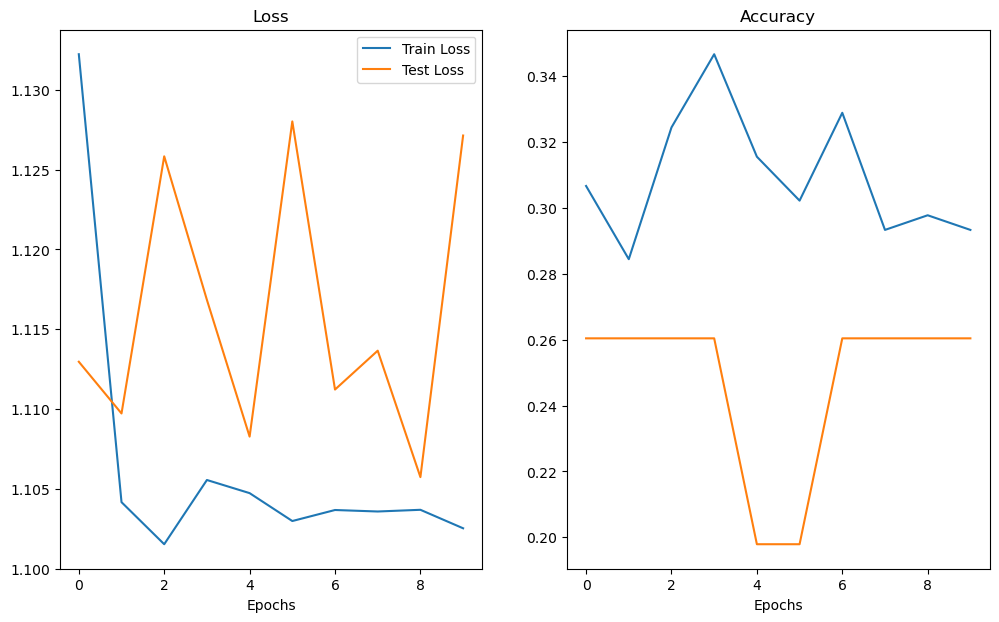

In [42]:
plot_loss_curves(results)

In [94]:
# Create model with data augmentation 
# TrivialAugment

train_transfor_trivial = transforms.Compose ([
    transforms.Resize(size=(64,64)), 
    transforms.TrivialAugmentWide(num_magnitude_bins=5), 
    transforms.ToTensor()
])


test_transform = transforms.Compose([
    transforms.Resize(size=(64,64)), 
    transforms.ToTensor()    
])

In [95]:
train_data_augmented = datasets.ImageFolder(root=train_dir, 
                                            transform = train_transfor_trivial)

test_data = datasets.ImageFolder(root=train_dir, 
                                 transform=test_transforms)

train_aug_dataloader = DataLoader(train_data_augmented, batch_size=32, shuffle=True)

test_dataloader = DataLoader(test_data, batch_size=32)

In [96]:
test_data[0][0].shape

torch.Size([3, 64, 64])

In [114]:
# train data using the same simple TVGG model

aug_model = SimpleModel0(3, 20, len(train_data_augmented.classes))

loss_fn = nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(aug_model.parameters(), lr = 0.01)

In [72]:
aug_model(next(iter(train_aug_dataloader))[0])

tensor([[-0.0140, -0.0045,  0.0492],
        [-0.0219, -0.0177,  0.0532],
        [-0.0151, -0.0097,  0.0490],
        [-0.0202, -0.0169,  0.0611],
        [-0.0165, -0.0188,  0.0492],
        [-0.0167, -0.0145,  0.0543],
        [-0.0219, -0.0147,  0.0550],
        [-0.0238, -0.0043,  0.0509],
        [-0.0212, -0.0093,  0.0451],
        [-0.0187, -0.0152,  0.0505],
        [-0.0189, -0.0208,  0.0503],
        [-0.0176, -0.0146,  0.0487],
        [-0.0181, -0.0222,  0.0446],
        [-0.0199, -0.0102,  0.0543],
        [-0.0186, -0.0128,  0.0478],
        [-0.0239, -0.0125,  0.0471],
        [-0.0232, -0.0134,  0.0588],
        [-0.0158, -0.0075,  0.0427],
        [-0.0288, -0.0126,  0.0596],
        [-0.0179, -0.0122,  0.0495],
        [-0.0263, -0.0120,  0.0545],
        [-0.0172, -0.0008,  0.0430],
        [-0.0193, -0.0091,  0.0570],
        [-0.0216, -0.0149,  0.0497],
        [-0.0214, -0.0174,  0.0510],
        [-0.0255, -0.0127,  0.0509],
        [-0.0144, -0.0106,  0.0489],
 

In [115]:
aug_results = train(model = aug_model, 
                    epochs = 20,
                    train_dl = train_aug_dataloader, 
                    test_dl= test_dataloader, 
                    loss = loss_fn, 
                    optimizer=optimizer)

Epoch: 0, Train Loss: 1.0928, Train_acc: 0.4258, Test_acc: 0.3047
Epoch: 1, Train Loss: 1.0880, Train_acc: 0.4258, Test_acc: 0.3047
Epoch: 2, Train Loss: 1.1080, Train_acc: 0.3047, Test_acc: 0.3047
Epoch: 3, Train Loss: 1.0985, Train_acc: 0.3047, Test_acc: 0.2930
Epoch: 4, Train Loss: 1.0934, Train_acc: 0.4141, Test_acc: 0.2930
Epoch: 5, Train Loss: 1.0910, Train_acc: 0.4141, Test_acc: 0.2930
Epoch: 6, Train Loss: 1.0902, Train_acc: 0.4141, Test_acc: 0.2930
Epoch: 7, Train Loss: 1.0919, Train_acc: 0.4141, Test_acc: 0.2930
Epoch: 8, Train Loss: 1.0902, Train_acc: 0.4141, Test_acc: 0.2930
Epoch: 9, Train Loss: 1.1262, Train_acc: 0.2930, Test_acc: 0.2930
Epoch: 10, Train Loss: 1.1070, Train_acc: 0.2930, Test_acc: 0.2930
Epoch: 11, Train Loss: 1.0957, Train_acc: 0.2891, Test_acc: 0.3047
Epoch: 12, Train Loss: 1.0994, Train_acc: 0.3047, Test_acc: 0.2930
Epoch: 13, Train Loss: 1.1108, Train_acc: 0.3086, Test_acc: 0.4102
Epoch: 14, Train Loss: 1.1024, Train_acc: 0.3516, Test_acc: 0.4023
Epoch

In [99]:
aug_results

{'train_loss': [1.0942923724651337,
  1.1031340062618256,
  1.105943351984024,
  1.0955799520015717,
  1.0993880182504654],
 'train_acc': [0.42578125, 0.3046875, 0.3046875, 0.42578125, 0.3203125],
 'test_loss': [1.1053758263587952,
  1.1068316847085953,
  1.1045387536287308,
  1.1003837883472443,
  1.0932592451572418],
 'test_acc': [0.3046875, 0.3046875, 0.3046875, 0.3046875, 0.30859375]}

[1.0973291546106339, 1.0937790721654892, 1.1069445610046387, 1.0950073897838593, 1.1047186106443405, 1.1052382439374924, 1.1014648377895355, 1.0988210588693619, 1.1020037978887558, 1.0965648889541626, 1.1040883213281631, 1.1009913980960846, 1.0959131866693497, 1.0986426174640656, 1.0957987308502197, 1.093324452638626, 1.0911561250686646, 1.089407205581665, 1.0886913537979126, 1.1157933473587036] [1.102892130613327, 1.1063770055770874, 1.1004793494939804, 1.1042026281356812, 1.099273532629013, 1.1003791093826294, 1.0969078689813614, 1.0999444127082825, 1.1013926714658737, 1.103370189666748, 1.0991612374782562, 1.1014243215322495, 1.1032887250185013, 1.1052635163068771, 1.1075062602758408, 1.1100299954414368, 1.1126125678420067, 1.1153175681829453, 1.117784008383751, 1.1085919439792633] [0.4140625, 0.4140625, 0.29296875, 0.4140625, 0.29296875, 0.29296875, 0.29296875, 0.27734375, 0.29296875, 0.41015625, 0.3046875, 0.3046875, 0.48046875, 0.3046875, 0.3203125, 0.4140625, 0.4140625, 0.414062

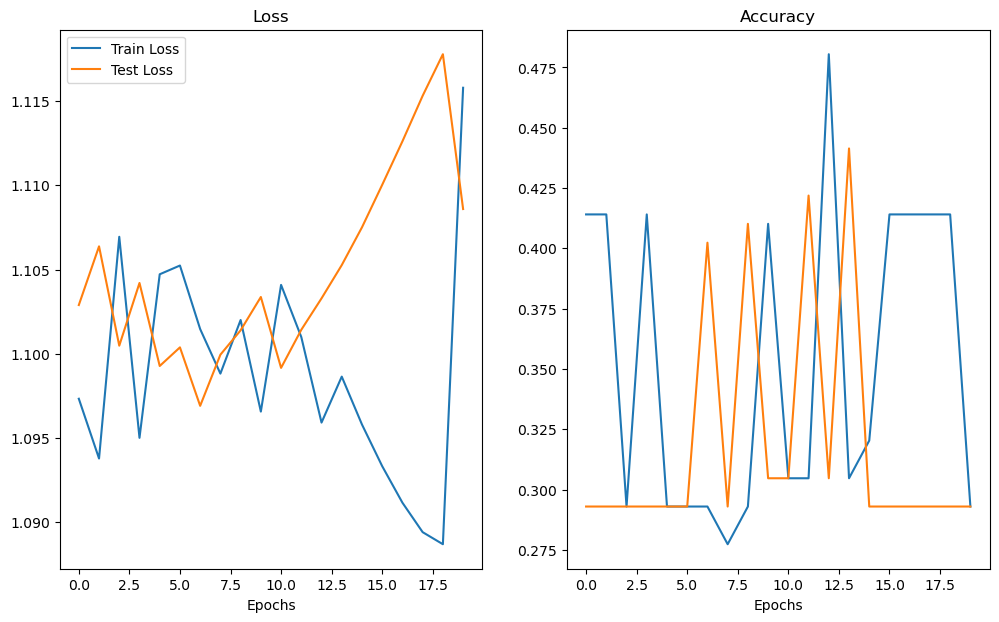

In [112]:
plot_loss_curves(aug_results)